Programming for Data Analysis Project 2019

The problem statement is to synthesise simulate a data set.  I looked up some definitions of syntheise to make sure I understood the requirements of the project.  It is a method that uses statistical techniques to combine results from different studies and obtain a quantitative estimate of the overall effect of a particular intervention or variable on a defined outcome—i.e., it is a statistical process for pooling data from many clinical trials to glean a clear answer. https://medical-dictionary.thefreedictionary.com/data+synthesis.  But there can be some cons.  Bias, potential for analytical sloppiness, lack of understanding of basic issues, failure to consider major covariates, and overstating the strengths and precision of the results from Segen's Medical Dictionary.

When we were given the problem statement I decided to look into the National Car Testing statics.  My own one had recently had to under go one and while it failed the first time it passed the retest.  I started to wonder that if there was any correlation between the car year of manufacture, model and pass rate.  As the 2019 year data is incomplete I chose 2018 instead.  My car had also done the nct in 2018 and once again it had failed the original test but passed the retest.

Compulsory car testing was introduced in Ireland in 2000 as part of an EU Directive that makes car testing compulsory in all member states. It is an offence to drive a car without displaying a National Car Testing Service disc, if the car is liable for testing. Offenders will face Class C fines, as well as penalty points.

The test is called the National Car Test and is carried out on behalf of the Government by the National Car Testing Service Ltd (NCTS). The test is aimed at improving road safety and enhancing environmental protection. 

If a vehicle is over 4 years old it has to take a test.  From the vehicle being 4 years to under 10 years old it has to be tested every 2 years.  Once the vehicle gets to 10 years but less than 30, it then has to be tested every year.  Between 30 and 39 years old the vehicle must be tested every 2 years again and it can not be used for commercial purposes.  That would apply mostly to vintage cars that would be mostly for show only.  There are exemptions to the nct also.  Vehicles registered prior to 1st January 1980 so not need to be tested, cars permanently based on islands that are not connected to the mainland do not require testing and motor vehicles belonging to the Armed Forces, the Garda Síochána or the Fire Service are not subject to mandatory testing.

https://www.citizensinformation.ie/en/travel_and_recreation/vehicle_standards/national_car_test.html

The National Car Test is separate to the CVRT (Commercial Vehicle Roadworthiness Test), which was formerly known as DoE (Department of Environment) Test.  The Commercial Vehicle Roadworthiness Test (CVRT) is a roadworthiness test for all commercial vehicles, buses with more than eight passenger seats and ambulances, all over one year old.  There are two types of commercial vehicle tests, one for Light Commercial Vehicles (LCVs) and one for Heavy Commercial Vehicles (HCVs).
 
The LCV test is for:
all small goods vehicles with a gross vehicle weight (GVW) of 3,500 kg or less

The HCV test covers all other commercial vehicles including:
goods vehicles over 3,500 kg GVW
goods trailers over 3,500 kg GVW
buses with more than eight passenger seats
ambulances

https://www.cvrt.ie/en/About-CVRT/Pages/What%20is%20the%20CVRT.aspx






Initially, I began by looking at the the nct.ie to see what information was available.  There was a section on statistics which had the pass, fail refusal and fail dangerous rated for 2018.  https://www.ncts.ie/1127
This was interesting but I wanted to see if a particular make/model out performed the rest of them or were they all broadly similar.  I then looked into the central statistics office statbank which not only provided the figures of pass/fail rates, it also broke them down by each centre. https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=ROA10&PLanguage=0  

This was very interesting but still not what I was looking for.  I then went to the RSA website which had the information I was looking for. https://www.rsa.ie/RSA/Your-Vehicle/Your-Vehicle-/NCT-Statistics-/

https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp Female and male full and provisional licences

Before I even begin to look at the data there are some assumptions I have.  It will be interesting to see how it will turn out.  First, I expect that the newer cars will have a much higher pass rate than older ones.  I expect about half to fail the first time but the majority then pass the second time.  I expect of the ones which fail initially about 10% will be listed as fail dangerous.  This is based soley on my own observations from takling to my family and friends over the last few years.

In [2]:
# Import all required libraries


#Import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [3]:
pwd

'C:\\Users\\Rebecca\\Desktop\\Prog Data 2019\\Programming-for-Data-Analysis-Project-2019'

In [4]:
import os
import csv

In [5]:
#import csv -  I used this method as when I loaded it originally it was throwing up an error. I eventually realised it was a few lines of text which was at the start of the file.  I deleted it and the error message went.
# https://github.com/llSourcell/tensorflow_chatbot/issues/17
#df = pd.read_csv(r"C:/Users/Rebecca/Desktop/Prog Data 2019/Programming-for-Data-Analysis-Project-2019/nct18.csv", delimiter = ',' , encoding = 'unicode_escape')
#print (df)

In [6]:
import csv
df = pd.read_csv(r"C:/Users/Rebecca/Desktop/Prog Data 2019/Programming-for-Data-Analysis-Project-2019/nct18.csv")

print (df)

            Make  Model  Year  Total  Pass  Pass %  Fail  Fail %  area1  \
0         ABARTH    595  2013      1     1   100.0     0     0.0      0   
1             AC  OTHER  2006      1     0     0.0     1   100.0      1   
2     ALFA ROMEO    145  1998      2     1    50.0     1    50.0      0   
3     ALFA ROMEO    145  1999      2     1    50.0     1    50.0      1   
4     ALFA ROMEO    145  2000      2     0     0.0     2   100.0      1   
5     ALFA ROMEO    146  1997      2     0     0.0     2   100.0      1   
6     ALFA ROMEO    146  1998      3     0     0.0     3   100.0      2   
7     ALFA ROMEO    146  1999      1     0     0.0     1   100.0      1   
8     ALFA ROMEO    146  2000      4     1    25.0     3    75.0      0   
9     ALFA ROMEO    147  2001     10     4    40.0     6    60.0      3   
10    ALFA ROMEO    147  2002     33    10    30.3    23    69.7      5   
11    ALFA ROMEO    147  2003     35    10    28.6    25    71.4      7   
12    ALFA ROMEO    147  

In [7]:
df.head()

,Make,Model,Year,Total,Pass,Pass %,Fail,Fail %,area1,area2,...,area19,area20,area21,area22,area23,area24,area25,area26,Incomplete,Incomplete %
0,ABARTH,595,2013,1,1,100.0,0,0.0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,AC,OTHER,2006,1,0,0.0,1,100.0,1,100.0,...,1,100.0,1,100.0,1,100.0,0,0.0,0,0.0
2,ALFA ROMEO,145,1998,2,1,50.0,1,50.0,0,0.0,...,0,0.0,1,50.0,0,0.0,0,0.0,0,0.0
3,ALFA ROMEO,145,1999,2,1,50.0,1,50.0,1,50.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,ALFA ROMEO,145,2000,2,0,0.0,2,100.0,1,50.0,...,1,50.0,1,50.0,1,50.0,0,0.0,0,0.0


In [8]:
df.tail()

,Make,Model,Year,Total,Pass,Pass %,Fail,Fail %,area1,area2,...,area19,area20,area21,area22,area23,area24,area25,area26,Incomplete,Incomplete %
8722,VOLVO,XC90,2013,2,0,0.0,2,100.0,0,0.0,...,0,0.0,2,100.0,0,0.0,0,0.0,0,0.0
8723,VOLVO,XC90,2014,69,44,63.8,25,36.2,4,5.8,...,5,7.2,7,10.1,0,0.0,0,0.0,0,0.0
8724,VOLVO,XC90,2015,3,2,66.7,1,33.3,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
8725,VOLVO,XC90,2016,1,1,100.0,0,0.0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
8726,WESTFIELD,OTHER,2006,3,1,33.3,2,66.7,1,33.3,...,1,33.3,0,0.0,0,0.0,0,0.0,0,0.0


In [9]:
# Far more columns than I want, delete the ones I do not need https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
df.drop(["area1", "area2", "area3","area4", "area5", "area6","area7", "area8", "area9","area10", "area11", "area12","area13", "area14", "area15","area16", "area17", "area18","area19", "area20", "area21","area22", "area23", "area24","area25", "area26"], axis=1, inplace=True)
df


,Make,Model,Year,Total,Pass,Pass %,Fail,Fail %,Incomplete,Incomplete %
0,ABARTH,595,2013,1,1,100.0,0,0.0,0,0.0
1,AC,OTHER,2006,1,0,0.0,1,100.0,0,0.0
2,ALFA ROMEO,145,1998,2,1,50.0,1,50.0,0,0.0
3,ALFA ROMEO,145,1999,2,1,50.0,1,50.0,0,0.0
4,ALFA ROMEO,145,2000,2,0,0.0,2,100.0,0,0.0
5,ALFA ROMEO,146,1997,2,0,0.0,2,100.0,0,0.0
6,ALFA ROMEO,146,1998,3,0,0.0,3,100.0,0,0.0
7,ALFA ROMEO,146,1999,1,0,0.0,1,100.0,0,0.0
8,ALFA ROMEO,146,2000,4,1,25.0,3,75.0,0,0.0
9,ALFA ROMEO,147,2001,10,4,40.0,6,60.0,0,0.0


In [10]:
# Another way to import the original file
#import csv
#df = pd.read_csv(r"C:/Users/Rebecca/Desktop/Prog Data 2019/Programming-for-Data-Analysis-Project-2019/nct.csv")

#print (df)

In [11]:
df.head()

,Make,Model,Year,Total,Pass,Pass %,Fail,Fail %,Incomplete,Incomplete %
0,ABARTH,595,2013,1,1,100.0,0,0.0,0,0.0
1,AC,OTHER,2006,1,0,0.0,1,100.0,0,0.0
2,ALFA ROMEO,145,1998,2,1,50.0,1,50.0,0,0.0
3,ALFA ROMEO,145,1999,2,1,50.0,1,50.0,0,0.0
4,ALFA ROMEO,145,2000,2,0,0.0,2,100.0,0,0.0


In [12]:
df.tail()

,Make,Model,Year,Total,Pass,Pass %,Fail,Fail %,Incomplete,Incomplete %
8722,VOLVO,XC90,2013,2,0,0.0,2,100.0,0,0.0
8723,VOLVO,XC90,2014,69,44,63.8,25,36.2,0,0.0
8724,VOLVO,XC90,2015,3,2,66.7,1,33.3,0,0.0
8725,VOLVO,XC90,2016,1,1,100.0,0,0.0,0,0.0
8726,WESTFIELD,OTHER,2006,3,1,33.3,2,66.7,0,0.0


In [13]:
df.describe()

,Year,Total,Pass,Pass %,Fail,Fail %,Incomplete,Incomplete %
count,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000
mean,2003.846224,153.977312,75.827088,47.664913,78.150223,52.335797,0.114702,0.254933
std,8.741819,580.532176,291.846370,32.205022,314.299107,32.205037,0.685312,3.385364
min,1932.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.000000,2.000000,1.000000,25.600000,1.000000,28.600000,0.000000,0.000000
50%,2005.000000,8.000000,4.000000,45.700000,4.000000,54.300000,0.000000,0.000000
75%,2010.000000,57.500000,27.500000,71.400000,28.000000,74.400000,0.000000,0.000000
max,2018.000000,10556.000000,5474.000000,100.000000,5970.000000,100.000000,20.000000,100.000000


In [14]:
# See if there is any information missing, it all appears to be there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8727 entries, 0 to 8726
Data columns (total 10 columns):
Make            8727 non-null object
Model           8727 non-null object
Year            8727 non-null int64
Total           8727 non-null int64
Pass            8727 non-null int64
Pass %          8727 non-null float64
Fail            8727 non-null int64
Fail %          8727 non-null float64
Incomplete      8727 non-null int64
Incomplete %    8727 non-null float64
dtypes: float64(3), int64(5), object(2)
memory usage: 681.9+ KB


In [15]:
# Another way to check and see if all the information is there.  It confirms that there is nothing missing.
df.isnull().sum()

Make            0
Model           0
Year            0
Total           0
Pass            0
Pass %          0
Fail            0
Fail %          0
Incomplete      0
Incomplete %    0
dtype: int64

In [16]:
# Begin to look at the data and see the make of the car and the number of them that failed the nct.
df.groupby(by='Make')['Fail'].sum()

Make
ABARTH                        0
AC                            1
ALFA ROMEO                 1436
ASQUITH                       2
ASTON MARTIN                 31
AUDI                      31171
AUSTIN                      181
AUSTIN ROVER                  0
BADSWORTH                     1
BEAUFORD                     14
BENTLEY                      63
BINZ                          0
BMW                       27495
BRAMWITH                      1
BRANFORD                      3
BRENCHLEY                     2
BRISTOL                       3
CADILLAC                      7
CARBODIES                     4
CATERHAM                      0
CHEVROLET                  2903
CHRYSLER                    831
CHRYSLER JEEP                 9
CITROEN                   13541
DACIA                       751
DAEWOO                      889
DAIHATSU                   1096
DAIMLER                      21
DATSUN                        1
DE LOREAN                     3
                          ...  
PON

In [17]:
# Select only the ones which I want to look into Hyundai Santa Fe.  I am calling it df2 to keep it separate from the original one.
df2=df[(df['Make'] == 'HYUNDAI') & (df['Model'] == 'SANTA FE')]
df2

,Make,Model,Year,Total,Pass,Pass %,Fail,Fail %,Incomplete,Incomplete %
3108,HYUNDAI,SANTA FE,2001,20,4,20.0,16,80.0,0,0.0
3109,HYUNDAI,SANTA FE,2002,139,29,20.9,110,79.1,0,0.0
3110,HYUNDAI,SANTA FE,2003,311,79,25.4,232,74.6,0,0.0
3111,HYUNDAI,SANTA FE,2004,614,169,27.5,445,72.5,1,0.2
3112,HYUNDAI,SANTA FE,2005,1048,341,32.5,707,67.5,1,0.1
3113,HYUNDAI,SANTA FE,2006,1310,398,30.4,912,69.6,0,0.0
3114,HYUNDAI,SANTA FE,2007,1552,481,31.0,1071,69.0,3,0.2
3115,HYUNDAI,SANTA FE,2008,642,216,33.6,426,66.4,0,0.0
3116,HYUNDAI,SANTA FE,2009,82,25,30.5,57,69.5,0,0.0
3117,HYUNDAI,SANTA FE,2010,221,99,44.8,122,55.2,0,0.0


In [18]:
# Another way to select the information, also acts as a double check to make sure I have the right information.
df[df['Model'].str.contains('SANTA FE')]

,Make,Model,Year,Total,Pass,Pass %,Fail,Fail %,Incomplete,Incomplete %
3108,HYUNDAI,SANTA FE,2001,20,4,20.0,16,80.0,0,0.0
3109,HYUNDAI,SANTA FE,2002,139,29,20.9,110,79.1,0,0.0
3110,HYUNDAI,SANTA FE,2003,311,79,25.4,232,74.6,0,0.0
3111,HYUNDAI,SANTA FE,2004,614,169,27.5,445,72.5,1,0.2
3112,HYUNDAI,SANTA FE,2005,1048,341,32.5,707,67.5,1,0.1
3113,HYUNDAI,SANTA FE,2006,1310,398,30.4,912,69.6,0,0.0
3114,HYUNDAI,SANTA FE,2007,1552,481,31.0,1071,69.0,3,0.2
3115,HYUNDAI,SANTA FE,2008,642,216,33.6,426,66.4,0,0.0
3116,HYUNDAI,SANTA FE,2009,82,25,30.5,57,69.5,0,0.0
3117,HYUNDAI,SANTA FE,2010,221,99,44.8,122,55.2,0,0.0


From the information provided by the RSA for 2018 over all there was approximately a  49% pass rate, 50% fail and 1% incomplete.  Within all years of Hyundai Santa Fe's it changed to an approximate 36% pass, 63% fail and 1% incomplete rate.

In [19]:
df7 = pd.read_csv(r"C:/Users/Rebecca/Desktop/Prog Data 2019/Programming-for-Data-Analysis-Project-2019/Hyundai.csv")
print (df7)

   Vehicle Make Vehicle Model  Year Of Birth  Total      %  Unnamed: 5  \
0       HYUNDAI      SANTA FE         2001.0     20    0.3         NaN   
1       HYUNDAI      SANTA FE         2002.0    139    2.0         NaN   
2       HYUNDAI      SANTA FE         2003.0    311    4.4         NaN   
3       HYUNDAI      SANTA FE         2004.0    614    8.7         NaN   
4       HYUNDAI      SANTA FE         2005.0   1048   14.9         NaN   
5       HYUNDAI      SANTA FE         2006.0   1310   18.7         NaN   
6       HYUNDAI      SANTA FE         2007.0   1552   22.1         NaN   
7       HYUNDAI      SANTA FE         2008.0    642    9.1         NaN   
8       HYUNDAI      SANTA FE         2009.0     82    1.2         NaN   
9       HYUNDAI      SANTA FE         2010.0    221    3.1         NaN   
10      HYUNDAI      SANTA FE         2011.0     64    0.9         NaN   
11      HYUNDAI      SANTA FE         2012.0    254    3.6         NaN   
12      HYUNDAI      SANTA FE         

Above is the number cars per year that went through the NCT in 2008 and expressed as a percentage of the total.

In [20]:
# I want to add two new variables to the table which states whether or not the car ran on petrol or diesel.  The figures are not available for that particular model so I again used statbank and got the breakdown for them. The information doesn not exist prior to 2010 and I only go up to 2015 for the nct so that is all I will import.  I plan to get a rough idea on the breakdown and apply it to my database.
import csv
df3 = pd.read_csv(r"C:/Users/Rebecca/Desktop/Prog Data 2019/Programming-for-Data-Analysis-Project-2019/dvp.csv")
print (df3)

     Year    2010    2011    2012    2013    2014    2015
0  Petrol   37934   31002   23888   25849   32098   41759
1  Diesel   81787   94918   88668   94176  111462  123951
2   Total  119721  125920  112556  120025  143560  165710


In [21]:
df3.head()

,Year,2010,2011,2012,2013,2014,2015
0,Petrol,37934,31002,23888,25849,32098,41759
1,Diesel,81787,94918,88668,94176,111462,123951
2,Total,119721,125920,112556,120025,143560,165710


In [22]:
# Show the percentage of petrol cars in 2010
print (round( 37934/ 119721 * 100,2))

# Show the percentage of petrol cars in 2011
print (round( 31002/ 125920 * 100,2))

# Show the percentage of petrol cars in 2012
print (round( 23888/ 112556 * 100,2))

# Show the percentage of petrol cars in 2013
print (round( 25849/ 120025* 100,2))

# Show the percentage of petrol cars in 2014
print (round( 32098/ 143560 * 100,2))

# Show the percentage of petrol cars in 2015
print (round( 41759/ 165710 * 100,2))



from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

31.69
24.62
21.22
21.54
22.36
25.2


The average of the 6 years I have data for is that petrol cars accounted over all for 24%.  I will apply this to the data I will synthesise.

In [23]:
import csv
df4 = pd.read_csv(r"C:/Users/Rebecca/Desktop/Prog Data 2019/Programming-for-Data-Analysis-Project-2019/avgmile.csv")
print (df4)

                         Year       Petrol          %       Diesel        %.1  \
0                        2001  12206.00000  46.015230  14320.00000  53.984770   
1                        2002  12854.00000  45.822045  15198.00000  54.177955   
2                        2003  12895.00000  45.002443  15759.00000  54.997557   
3                        2004  12904.00000  44.456694  16122.00000  55.543306   
4                        2005  13076.00000  44.352486  16406.00000  55.647514   
5                        2006  12790.00000  43.180284  16830.00000  56.819716   
6                        2007  13432.00000  43.243939  17629.00000  56.756061   
7                        2008  13085.00000  40.242965  19430.00000  59.757035   
8                        2009  12887.00000  39.704840  19570.00000  60.295160   
9                        2010  10822.00000  36.642514  18712.00000  63.357486   
10                       2011  10794.00000  35.751192  19398.00000  64.248808   
11                       201

Another variable I will add to my data is mileage and it will be split between petrol and diesel.  I sourced the information from https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp and tidyied it up to suit my requirements as total mileage will have an effect on the pass/fail rate.  The average km per year over a 14 year period (The information only goes to 2015 at the moment)  for a petrol car is 13,489 and diesel is 19,598.


In [24]:
# The final variables I will enter will be sex, and licence status.  

df6 = pd.read_csv(r"C:/Users/Rebecca/Desktop/Prog Data 2019/Programming-for-Data-Analysis-Project-2019/driver.csv")

print (df6)

     2018  Full Driving Licences            %  \
0    Male                 1422852   53.347721   
1  Female                 1244276   46.652279   
2   Total                 2667128  100.000000   

   Learner Permit Driving Licences         %.1  
0                           119686   49.855872  
1                           120378   50.144128  
2                           240064  100.000000  


 I obtained the 2018 information from https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp From the above it can be seen that 53% of males and 47% of females held full driving licences.  The provisional licences were more evenly split with approximately 50% of each sexes.  Overall, 92% of licences held in 2018 were Full and 8% were Provisional.

Now I have all my variables and their values I will recreate the dataframe based on that information.

In [25]:
df5 = pd.DataFrame(columns=["year", "fuel", "status", "sex", "licence_type", "mileage"])



# Populate the data with the number of cars per year.
df5['year'] = np.random.choice(["2001", "2002","2003","2004","2005","2006","2007","2008","2009",2010,2011,2012,2013,2014,2015], p=[0.004, 0.02, 0.044, 0.087, 0.149, 0.187, 0.221, 0.091, 0.012, 0.031, 0.009, 0.036, 0.013, 0.083, 0.013], size=(100))


# Create the fuel types
fuel = ['petrol', 'diesel']

# Populate the Fuel column with petrol and diesel
df5['fuel'] = np.random.choice(fuel, 100, p=[0.24, 0.76])



# Create the status types
status = ["pass", "fail", "incomplete"]

# Populate the status column 
df5['status'] = np.random.choice(status, 100, p=[0.36, 0.63, 0.01])

# Create the sexes
sex = ['male', 'female']

# Populate the column
df5['sex'] = np.random.choice(sex, 100, p=[0.53, 0.47])

# Create the licence_type categories
licence_type = ["full", "learner"]

# Populate it
df5['licence_type'] = np.random.choice(licence_type, 100, p=[0.92, 0.08])

print (df5)

    year    fuel      status     sex licence_type mileage
0   2004  petrol        fail  female         full     NaN
1   2004  petrol        pass  female         full     NaN
2   2007  diesel        pass    male      learner     NaN
3   2007  diesel        fail  female         full     NaN
4   2005  petrol        pass    male         full     NaN
5   2004  petrol        fail  female      learner     NaN
6   2014  petrol        pass  female         full     NaN
7   2015  petrol        fail  female         full     NaN
8   2004  diesel  incomplete    male         full     NaN
9   2006  diesel        fail  female         full     NaN
10  2003  petrol        fail    male         full     NaN
11  2014  petrol        fail    male         full     NaN
12  2007  diesel        pass    male         full     NaN
13  2007  diesel        fail    male         full     NaN
14  2010  diesel        fail  female         full     NaN
15  2006  diesel        fail    male         full     NaN
16  2007  dies

In [36]:
# Define a function to map the values 
def set_value(row_number, assigned_value):
    return np.random.randint(1,assigned_value[row_number])

#Create the dictionary
year_dictionary ={'2001' : 202335, '2002' : 188846, '2003' : 175357, "2004" : 161868, "2005" : 148379, "2006": 134890, "2007" : 121401, "2008" : 107912, "2009" :94423,"2010" :80934, "2011" :67445, "2012" :53956, "2013" :40467, "2014" :26978, "2015" :13489}

df5['mileage'] = df5['year'].apply(set_value, args =(year_dictionary, )) 

df5


,year,fuel,status,sex,licence_type,mileage
0,2004,petrol,fail,female,full,154485
1,2004,petrol,pass,female,full,90874
2,2007,diesel,pass,male,learner,31732
3,2007,diesel,fail,female,full,25437
4,2005,petrol,pass,male,full,53844
5,2004,petrol,fail,female,learner,28978
6,2014,petrol,pass,female,full,8884
7,2015,petrol,fail,female,full,5442
8,2004,diesel,incomplete,male,full,130806
9,2006,diesel,fail,female,full,32496


I found it very difficult to get this working properly. I eventually had to go to https://stackoverflow.com/questions/59181287/python-how-to-apply-this-formula-to-every-line-in-the-database-so-each-line-giv and get help. You can see my code vs what worked here.

In [26]:
# Generate year of vehicle between 2001 and 2015, with 100 results using random function
import random
random.seed(50) # Set the seed so the results are consistent and repeatable
year = np.random.randint(2001, 2016, 100)

year

array([2005, 2003, 2003, 2003, 2004, 2015, 2010, 2003, 2004, 2012, 2011,
       2013, 2014, 2009, 2010, 2010, 2005, 2011, 2002, 2001, 2007, 2010,
       2009, 2003, 2010, 2011, 2013, 2015, 2010, 2011, 2004, 2007, 2008,
       2006, 2009, 2006, 2007, 2010, 2012, 2008, 2013, 2013, 2008, 2008,
       2012, 2006, 2004, 2002, 2002, 2008, 2007, 2009, 2003, 2013, 2002,
       2009, 2002, 2007, 2008, 2013, 2012, 2004, 2011, 2004, 2013, 2004,
       2002, 2015, 2013, 2007, 2011, 2010, 2009, 2014, 2007, 2010, 2006,
       2012, 2014, 2006, 2013, 2009, 2012, 2013, 2008, 2006, 2007, 2012,
       2010, 2009, 2003, 2007, 2005, 2009, 2006, 2004, 2014, 2003, 2007,
       2009])

In [27]:
# Average year of the sample
np.mean (year)

2008.23

The mean is what I would have expected from looking at the actual data from the RSA.

In [28]:
np.median (year)

2008.5

<Figure size 720x360 with 0 Axes>

(array([15., 18., 27., 23., 17.]),
 array([2001. , 2003.8, 2006.6, 2009.4, 2012.2, 2015. ]),
 <a list of 5 Patch objects>)

Text(0.5, 0, 'Year of Manufacture')

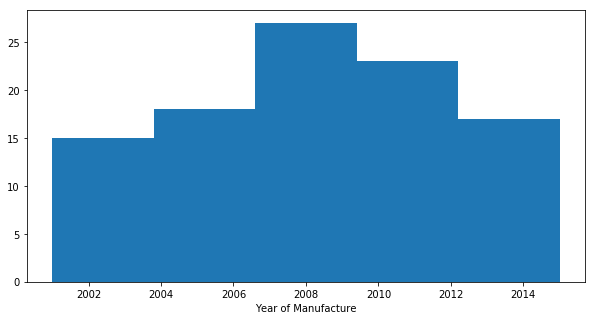

In [29]:
# Histogram showing the years of manufacture

plt.figure(figsize=(10,5))
plt.hist(year, bins=5)
plt.xlabel('Year of Manufacture')
plt.show()

This shows that 2002 and 2003 had more Hyundai Santa Fe's registered than other years.  Not what I was expecting.  The second highest period for registration was 2007 which is more like I thought. 

In [30]:
yr = np.random.normal(2007, 3, 100).round(0)  # 2017 is the mean, 3 is standard deviation, 100 is the size of the sample with the years rounded.
yr

array([2003., 2010., 2005., 2004., 2009., 2007., 2007., 2009., 2004.,
       2003., 2005., 2007., 2006., 2007., 2009., 2006., 2003., 2008.,
       2008., 2003., 2003., 2005., 2006., 2012., 2008., 2009., 2009.,
       2007., 2007., 2006., 2006., 2005., 2006., 2011., 2005., 2010.,
       2006., 2012., 2004., 2003., 2008., 2005., 2005., 2013., 2013.,
       2010., 2012., 2010., 2012., 2004., 2008., 2012., 2004., 2009.,
       2006., 2007., 1998., 2011., 2008., 2007., 2009., 2010., 2007.,
       2011., 2004., 2006., 2006., 2003., 2006., 2004., 2005., 2009.,
       2009., 2003., 2008., 2003., 2009., 2007., 2004., 2009., 2007.,
       2006., 2005., 2009., 2003., 2006., 2003., 2006., 2005., 2008.,
       2007., 2008., 2005., 2010., 2005., 2011., 2005., 2004., 2007.,
       2007.])

(array([ 1.,  0.,  0., 11., 22., 14., 23., 12., 10.,  7.]),
 array([1998. , 1999.5, 2001. , 2002.5, 2004. , 2005.5, 2007. , 2008.5,
        2010. , 2011.5, 2013. ]),
 <a list of 10 Patch objects>)

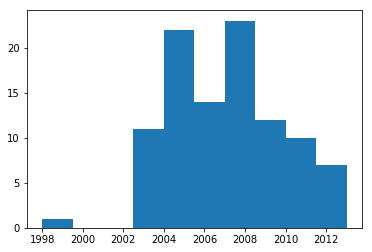

In [31]:
plt.hist(yr) #plot the histogram of the random data to view the distribution of data

These results are very interesting.  The information from the actual RSA NCT statistics show that 2017 had the most amount of Santa Fe's for NCT with just over 22% for that year alone.  At the risk of clouding the data and forcing my own opinions on it, I know I purchased the 2007 model (8 years ago) as there was a large price increase on the 2008 model as that was when tax began to be calculated on the emmissions of a vehicle, rather than the cc.  Also, there was a design upgrade which began with the 2006 model and did  not change until recently.  Some buyers may have preferred the newer looking model rather than the older one.  Although 2005 model had almost 15% and 2006 almost 19% of all models tested.  In future, as the age of these cars increase I would expect a drop off in their overall percentage of the total tested.  They may become uneconimical to continue with where their running and maintenance costs become outweighed by the offer of trade in allownces, low finance options and extended warranty.  The cost of motor tax will have an impact also.  A 2007 Santa Fe annual car tax is €951, compared with €390 for a 2017 model.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a27d2f8d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1a27d302400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a27d2f8908>],
 'medians': [<matplotlib.lines.Line2D at 0x1a27d302a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a27d302e80>],
 'means': [<matplotlib.lines.Line2D at 0x1a27d302dd8>]}

Text(0.5, 1.0, 'Mean and Median Year of Manufacture (using numpy.random)')

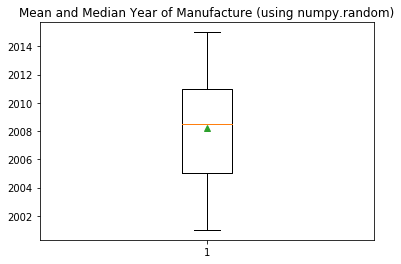

In [32]:
plt.boxplot(year, showmeans=True)
plt.title ("Mean and Median Year of Manufacture (using numpy.random)")
plt.show()



The line inside the box represents the median and the triangle represents the mean.  The mean is very close to the median which tends towards normal distribution.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a27d358c18>,
 'caps': [<matplotlib.lines.Line2D at 0x1a27d3612e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a27d358828>],
 'medians': [<matplotlib.lines.Line2D at 0x1a27d361978>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a27d32d710>],
 'means': [<matplotlib.lines.Line2D at 0x1a27d361cc0>]}

Text(0.5, 1.0, 'Mean and Median Year of Manufacture (created using random.normal)')

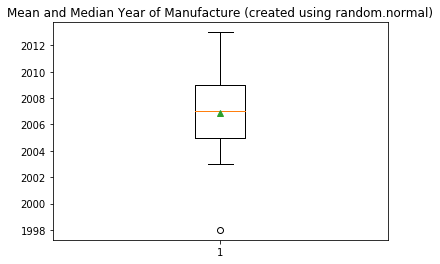

In [33]:
plt.boxplot(yr, showmeans=True)
plt.title ("Mean and Median Year of Manufacture (created using random.normal)")
plt.show()

Data from both .normal and .random are broadly similar.

Fuel

As discussed further up, the spread of diesel engines to petrol engines was not readily available so I took the available information for 2010 to 2015 and assuming the overall average trend continues, diesel will be 76% and petrol 24%. The p in the function allows me to skew the information to represent my findings.

In [34]:
fuel = np.random.choice(["Diesel", "Petrol"], 100, p=[0.76, 0.24])
fuel

array(['Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel',
       'Diesel', 'Petrol', 'Diesel', 'Petrol', 'Diesel', 'Diesel',
       'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel',
       'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel',
       'Petrol', 'Petrol', 'Diesel', 'Diesel', 'Diesel', 'Petrol',
       'Diesel', 'Petrol', 'Petrol', 'Diesel', 'Petrol', 'Diesel',
       'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel',
       'Petrol', 'Petrol', 'Petrol', 'Diesel', 'Diesel', 'Petrol',
       'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel',
       'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Petrol', 'Diesel',
       'Diesel', 'Diesel', 'Petrol', 'Petrol', 'Diesel', 'Diesel',
       'Diesel', 'Diesel', 'Petrol', 'Diesel', 'Diesel', 'Diesel',
       'Diesel', 'Diesel', 'Petrol', 'Diesel', 'Diesel', 'Petrol',
       'Petrol', 'Diesel', 'Diesel', 'Diesel', 'Petrol', 'Diesel',
       'Petrol', 'Petrol', 'Diesel', 'Diesel', 'Petrol', 'Petr

Mileage

In [ ]:
# Create a normal distribution function to show there are more diesel cars than petrol and diesel cars do more mileage than petrol.
def what_mileage(miles):
        if fuel == 'Petrol':
            return np.random.normal(13489, 0.24)
        elif fuel == 'Diesel':
            return np.random.normal(19598, 0.76)

Status

There are three options available and I have weighted them accordingly.

In [ ]:
status = np.random.choice(["Pass", "Fail", "Incomplete"], 100, p=[0.36, 0.63, 0.01])
status

Sex

Again, I have weighted this to represent real world available data.

In [ ]:
sex = np.random.choice(["Male", "Female"], 100, p=[0.53, 0.47])
sex

Licence Type

In [ ]:
licence_type = np.random.choice(["Full", "Learner"],100, p=[0.92, 0.08])
licence_type

In [ ]:
# Using popitem to try and get mileage to vary dependant on year of manufacture. Unsuccessful.

y ={'2001' : np.random.randint(1,202335), '2002' : np.random.randint(1,188846,100), '2003' : np.random.randint(1,175357), "2004" : np.random.randint(1,161868), "2005" : np.random.randint(1,148379), "2006": np.random.randint(1,134890), "2007" : np.random.randint(1,121401), "2008" : np.random.randint(1,107912), "2009" :np.random.randint(1,94423),"2010" :np.random.randint(1,80934), "2011" :np.random.randint(1,67445), "2012" :np.random.randint(1,53956), "2013" :np.random.randint(1,40467), "2014" :np.random.randint(1,26978), "2015" :np.random.randint(1,13489)}
y.popitem()
y
y.popitem()